**Import necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading dataset from csv file**

In [3]:
df = pd.read_csv('C:/Users/DELL/Desktop/best-selling-books.csv')
df

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga
...,...,...,...,...,...,...
169,The Goal,Eliyahu M. Goldratt,English,1984,10.0,NaN
170,Fahrenheit 451,Ray Bradbury,English,1953,10.0,NaN
171,Angela's Ashes,Frank McCourt,English,1996,10.0,NaN
172,The Story of My Experiments with Truth (સત્યના...,Mohandas Karamchand Gandhi,Gujarati,1929,10.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           174 non-null    object 
 1   Author(s)                      174 non-null    object 
 2   Original language              174 non-null    object 
 3   First published                174 non-null    int64  
 4   Approximate sales in millions  174 non-null    float64
 5   Genre                          118 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB


In [5]:
df.shape

(174, 6)

In [6]:
df.dtypes

Book                              object
Author(s)                         object
Original language                 object
First published                    int64
Approximate sales in millions    float64
Genre                             object
dtype: object

In [7]:
df.columns

Index(['Book', 'Author(s)', 'Original language', 'First published',
       'Approximate sales in millions', 'Genre'],
      dtype='object')

In [8]:
df.describe()

,First published,Approximate sales in millions
count,174.000000,174.000000
mean,1962.522989,30.097126
std,64.268737,27.957985
min,1304.000000,10.000000
25%,1947.000000,14.000000
50%,1974.000000,20.000000
75%,1995.000000,36.300000
max,2018.000000,200.000000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
First published,174.0,1962.522989,64.268737,1304.0,1947.0,1974.0,1995.0,2018.0
Approximate sales in millions,174.0,30.097126,27.957985,10.0,14.0,20.0,36.3,200.0


In [10]:
df.isna().sum()

Book                              0
Author(s)                         0
Original language                 0
First published                   0
Approximate sales in millions     0
Genre                            56
dtype: int64

In [11]:
df['Genre']=df['Genre'].fillna('Unknown')

In [12]:
df.isna().sum()

Book                             0
Author(s)                        0
Original language                0
First published                  0
Approximate sales in millions    0
Genre                            0
dtype: int64

In [28]:
df.head(10)

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre,book
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction,A Tale of Two Cities
1,The Little Prince,Antoine de Saint-Exupéry,French,1943,200.0,Novella,The Little Prince
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy,Harry Potter and the Philosopher's Stone
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery,And Then There Were None
4,Dream of the Red Chamber,Cao Xueqin,Chinese,1791,100.0,Family saga,Dream of the Red Chamber
5,The Hobbit,J. R. R. Tolkien,English,1937,100.0,Fantasy,The Hobbit
6,"The Lion, the Witch and the Wardrobe",C. S. Lewis,English,1950,85.0,"Fantasy, Children's fiction","The Lion, the Witch and the Wardrobe"
7,She: A History of Adventure,H. Rider Haggard,English,1887,83.0,Adventure,She: A History of Adventure
8,Vardi Wala Gunda,Ved Prakash Sharma,Hindi,1992,80.0,Detective,Vardi Wala Gunda
9,The Da Vinci Code,Dan Brown,English,2003,80.0,Mystery thriller,The Da Vinci Code


In [17]:
import re

In [23]:
def remove_script(text):
    return re.sub(r'\s*\([^)]*\)', '', str(text)).strip()

In [26]:
df['Book'] = df.apply(
    lambda row: remove_script(row['Book']) if str(row['Original language']).strip() != 'English' else row['Book'],
    axis=1
)

In [27]:
df.tail(10)

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre,book
164,The Joy of Sex,Alex Comfort,English,1972,10.0,Unknown,The Joy of Sex
165,The Gospel According to Peanuts,Robert L. Short,English,1965,10.0,Unknown,The Gospel According to Peanuts
166,The Subtle Art of Not Giving a Fuck,Mark Manson,English,2016,10.0,Unknown,The Subtle Art of Not Giving a Fuck
167,Life of Pi,Yann Martel,English,2001,10.0,Unknown,Life of Pi
168,The Front Runner,Patricia Nell Warren,English,1974,10.0,Unknown,The Front Runner
169,The Goal,Eliyahu M. Goldratt,English,1984,10.0,Unknown,The Goal
170,Fahrenheit 451,Ray Bradbury,English,1953,10.0,Unknown,Fahrenheit 451
171,Angela's Ashes,Frank McCourt,English,1996,10.0,Unknown,Angela's Ashes
172,The Story of My Experiments with Truth,Mohandas Karamchand Gandhi,Gujarati,1929,10.0,Unknown,The Story of My Experiments with Truth
173,Bridget Jones's Diary,Helen Fielding,English,1996,10.0,Unknown,Bridget Jones's Diary


**Visualising Top 10 Best-Selling Books**

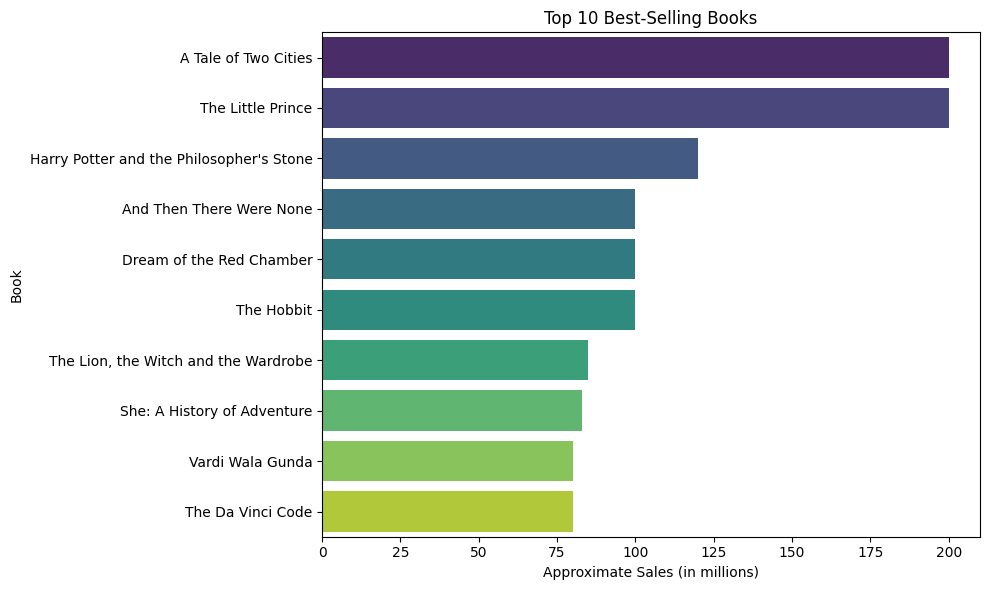

In [29]:
book = df.sort_values(by='Approximate sales in millions', ascending=False).head(10)
y=book['Book']
x=book['Approximate sales in millions']
plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=y, data=book, palette='viridis', hue=y, legend=False)
plt.title('Top 10 Best-Selling Books')
plt.xlabel('Approximate Sales (in millions)')
plt.ylabel('Book')
plt.tight_layout()
plt.show()

**Visualising Top 10 Best-Selling Authors**

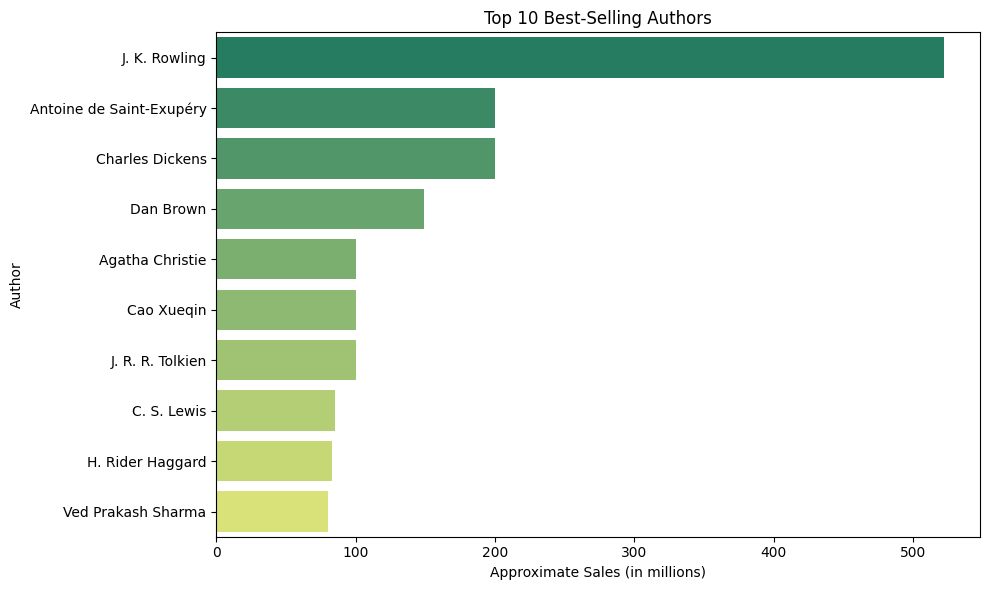

In [30]:
auth = df.groupby('Author(s)')['Approximate sales in millions'].sum().nlargest(10)
auth=auth.reset_index()
y=auth['Author(s)']
x=auth['Approximate sales in millions']
plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=y, data=auth, palette='summer', hue=y)
plt.title('Top 10 Best-Selling Authors')
plt.xlabel('Approximate Sales (in millions)')
plt.ylabel('Author')
plt.tight_layout()
plt.show()

**Visualising Top 10 Best-Selling Languages**

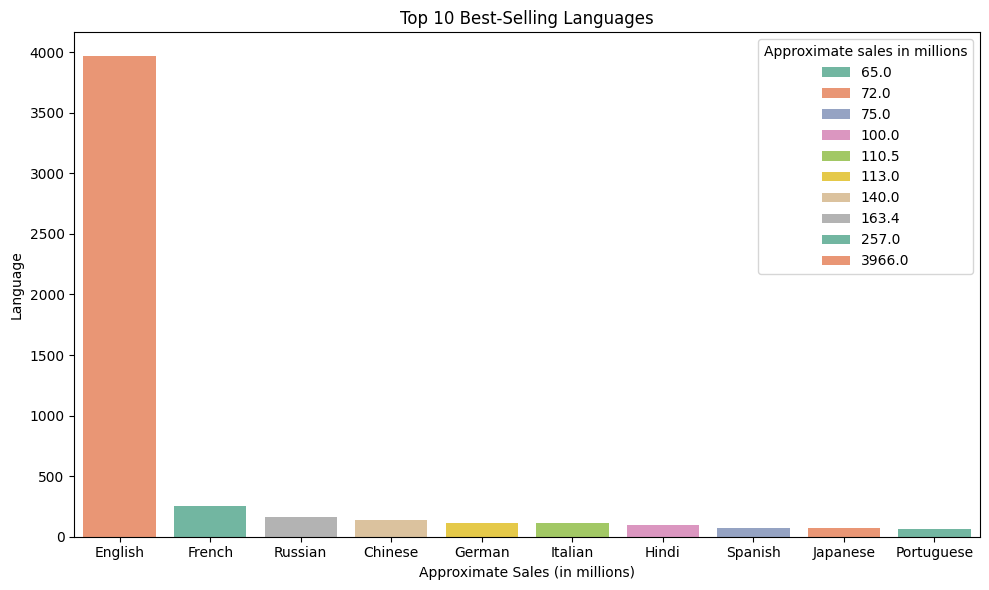

In [31]:
lang =df.groupby('Original language')['Approximate sales in millions'].sum().reset_index().sort_values('Approximate sales in millions', ascending = False).head(10)
x=lang['Original language']
y=lang['Approximate sales in millions']
plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=y, data=auth, palette='Set2', hue=y)
plt.title('Top 10 Best-Selling Languages')
plt.xlabel('Approximate Sales (in millions)')
plt.ylabel('Language')
plt.tight_layout()
plt.show()

**Plotting Books Per Language**

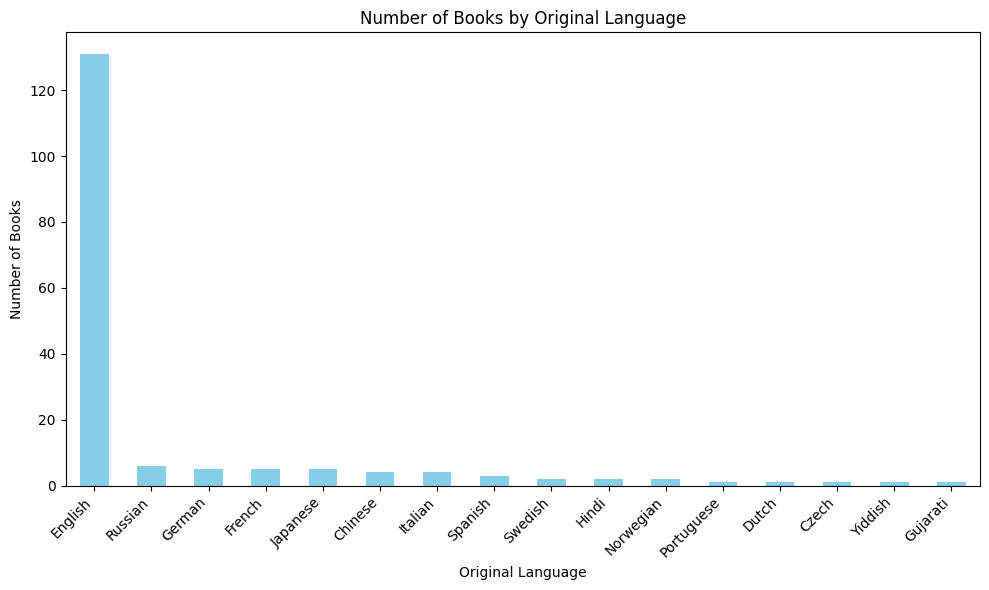

In [62]:
language_counts = df['Original language'].value_counts()
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Books by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

**Visualising Distribution of Sales**

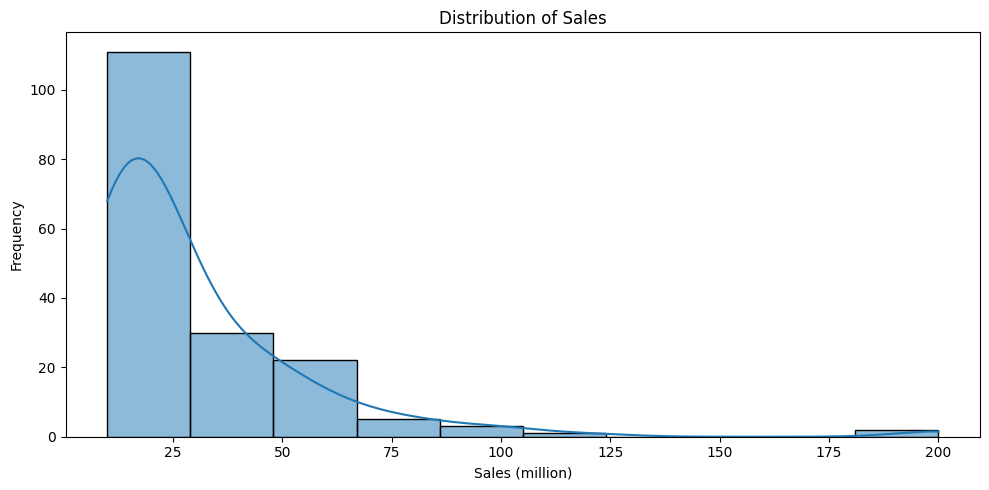

In [35]:
sales = df['Approximate sales in millions']
plt.figure(figsize=(10, 5))
sns.histplot(sales, bins=10, kde=True) 
plt.title('Distribution of Sales')
plt.ylabel('Frequency')
plt.xlabel('Sales (million)')
plt.tight_layout()
plt.show()

**Visualising Top 10 Best-Selling Genres**

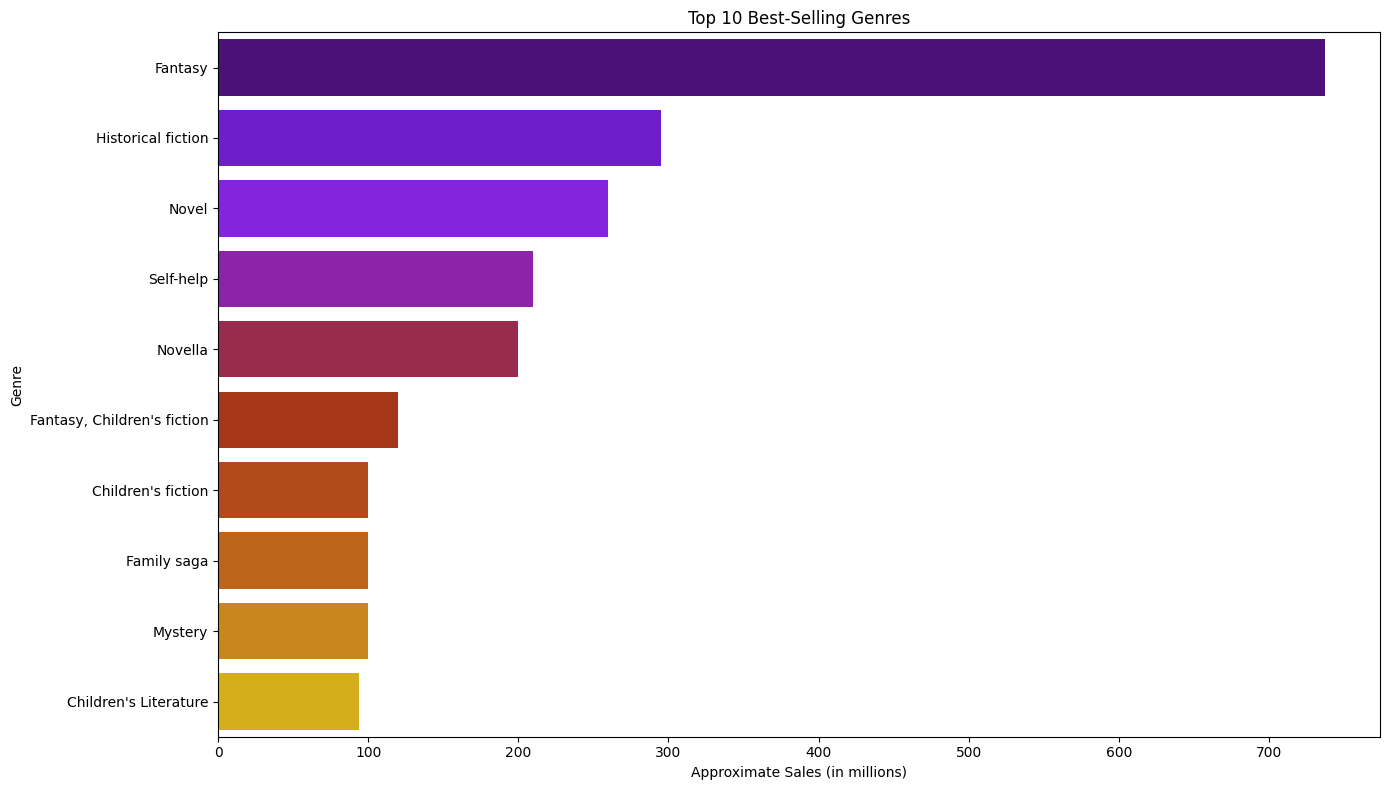

In [32]:
dfiltered =df[df['Genre'] != 'Unknown']
gen =dfiltered.groupby('Genre')['Approximate sales in millions'].sum().reset_index().sort_values('Approximate sales in millions', ascending = False).head(10)
y=gen['Genre']
x=gen['Approximate sales in millions']
plt.figure(figsize=(14, 8))
sns.barplot(x=x, y=y, data=gen, palette='gnuplot', hue=y)
plt.title('Top 10 Best-Selling Genres')
plt.xlabel('Approximate Sales (in millions)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

**Visualising Books Sale Trend Across Years**

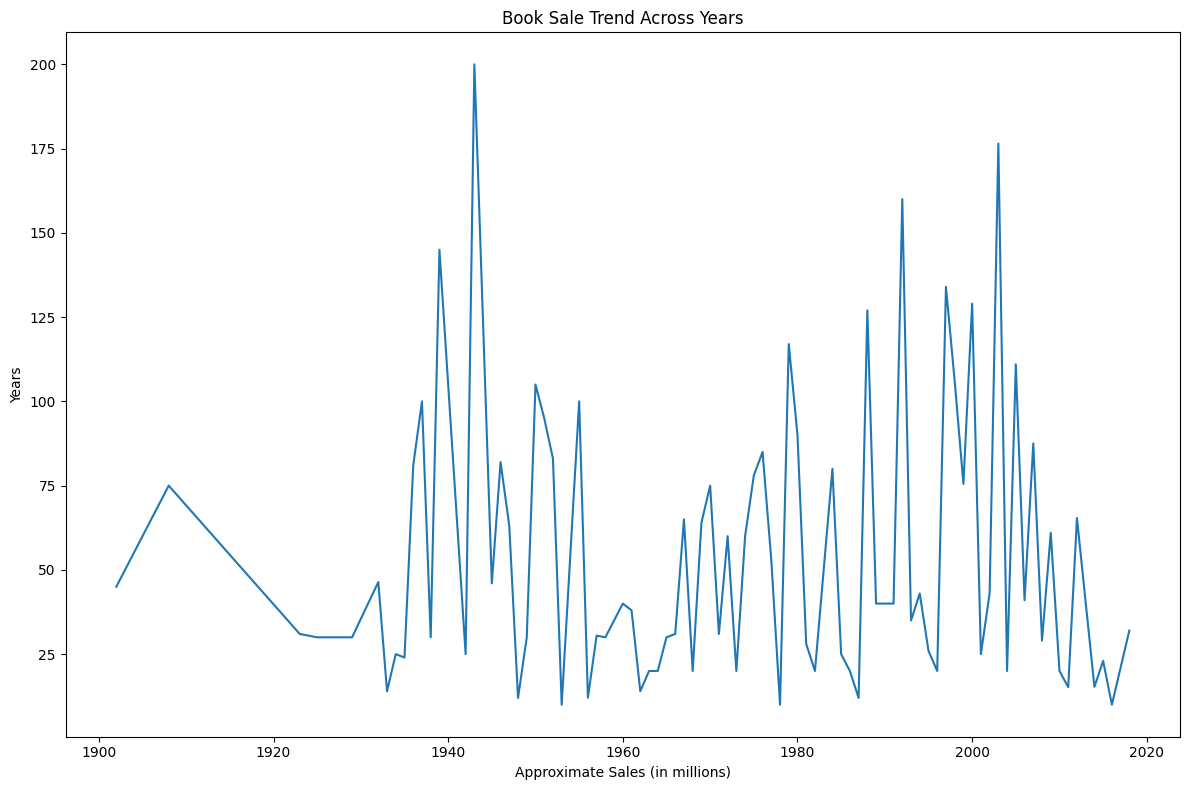

In [61]:
dfilt = df[df['First published']>=1900]
yrs =dfilt.groupby('First published')['Approximate sales in millions'].sum().reset_index()
x=yrs['First published']
y=yrs['Approximate sales in millions']
plt.figure(figsize=(12, 8))
sns.lineplot(x=x, y=y, data=yrs)
plt.title('Book Sale Trend Across Years')
plt.xlabel('Approximate Sales (in millions)')
plt.ylabel('Years')
plt.tight_layout()
plt.show()

**Plotting a Heatmap for Correlations**

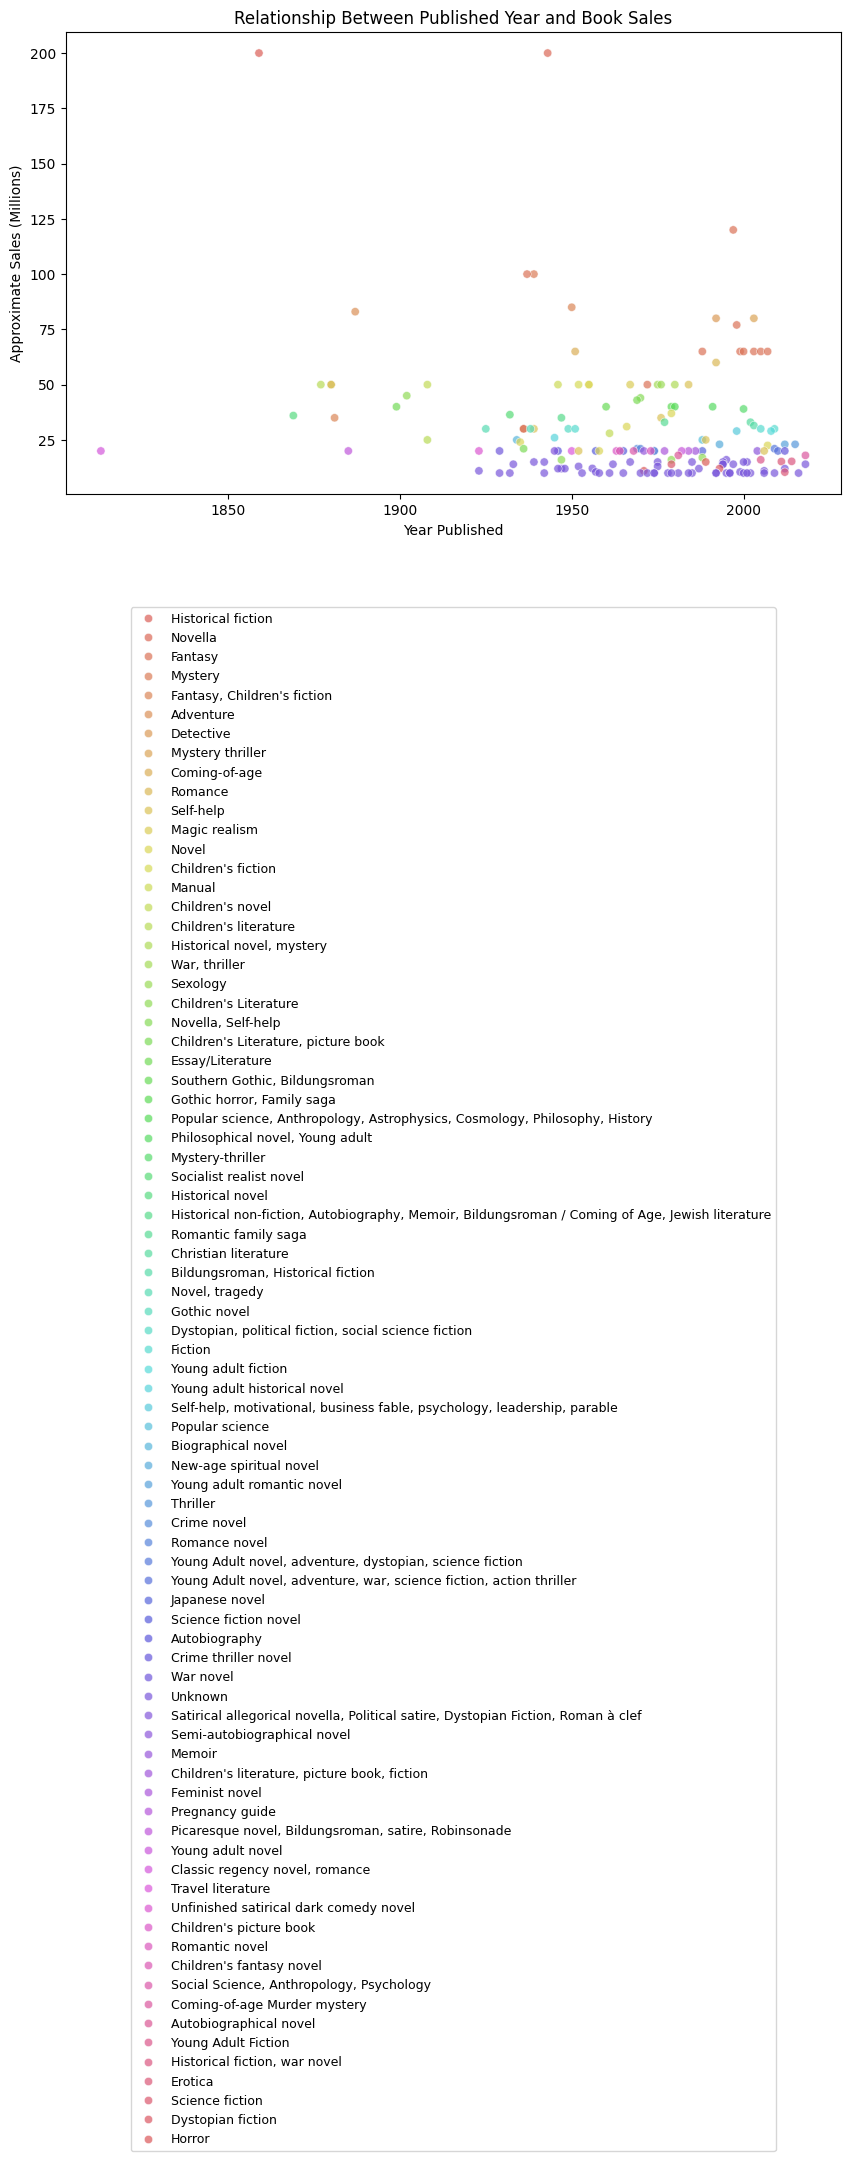

In [48]:
dflt = df[df["First published"]>=1800]
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="First published",
    y="Approximate sales in millions",
    hue="Genre",
    data=dflt,
    alpha=0.7,
    palette=sns.color_palette("hls", 80)
    
)
plt.xlabel("Year Published")
plt.ylabel("Approximate Sales (Millions)")
plt.title("Relationship Between Published Year and Book Sales")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -3.6), fontsize=9)
plt.show()